In [5]:
import pandas as pd

# Load the Telco Customer Churn dataset
file_path = 'Telco_customer_churn.xlsx'  # Ensure this file is in the same directory
churn_df = pd.read_excel("Telco_customer_churn.xlsx")

# Display first few rows
churn_df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
from sklearn.preprocessing import LabelEncoder

# Remove extra spaces in column names
churn_df.columns = churn_df.columns.str.strip()

# Encode categorical variables
label_encoders = {}
for column in churn_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    churn_df[column] = le.fit_transform(churn_df[column].astype(str))
    label_encoders[column] = le

# Confirm preprocessing
churn_df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,2564,1,0,0,562,90003,327,33.964131,-118.272783,1,...,0,1,3,53.85,157,1,1,86,3239,3
1,6511,1,0,0,562,90005,405,34.059281,-118.307420,0,...,0,1,2,70.70,925,1,1,67,2701,13
2,6551,1,0,0,562,90006,393,34.048013,-118.293953,0,...,0,1,2,99.65,6104,1,1,86,5372,13
3,5604,1,0,0,562,90010,410,34.062125,-118.315709,0,...,0,1,2,104.80,2646,1,1,84,5003,13
4,174,1,0,0,562,90015,385,34.039224,-118.266293,1,...,0,1,0,103.70,4265,1,1,89,5340,2


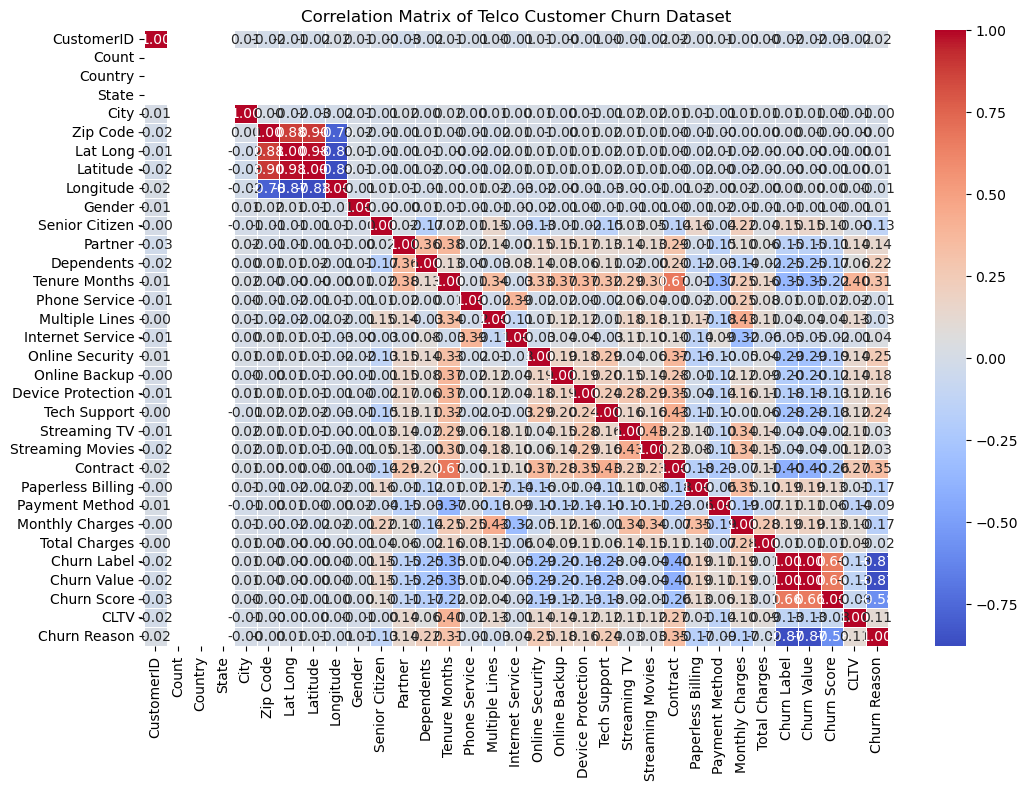

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = churn_df.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Telco Customer Churn Dataset')
plt.show()

In [8]:
# Sort correlations with respect to 'Churn Label'
churn_corr = correlation_matrix['Churn Label'].abs().sort_values(ascending=False)

# Display top predictors excluding 'Churn Label' itself
top_predictors = churn_corr.drop('Churn Label').head(10)

print("Top predictors of customer churn:")
print(top_predictors)

Top predictors of customer churn:
Churn Value        1.000000
Churn Reason       0.869116
Churn Score        0.664897
Contract           0.396713
Tenure Months      0.352229
Online Security    0.289309
Tech Support       0.282492
Dependents         0.248542
Online Backup      0.195525
Monthly Charges    0.193356
Name: Churn Label, dtype: float64


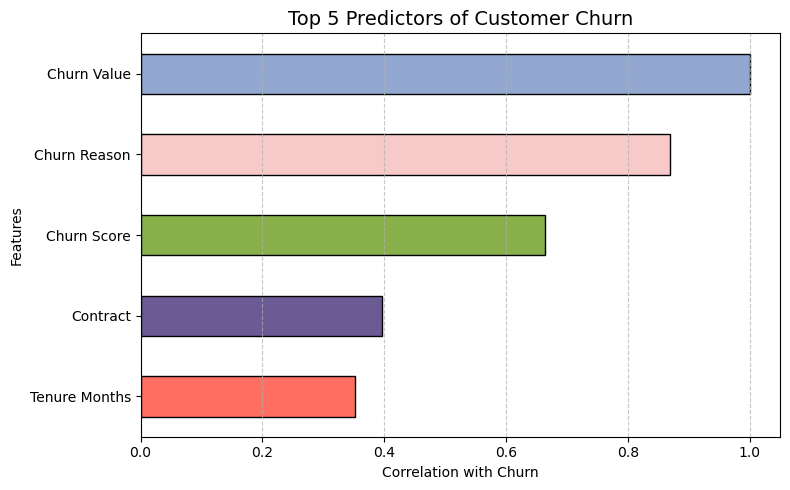

In [10]:
import matplotlib.pyplot as plt

# Assuming top_predictors is already defined
top5_predictors = top_predictors.head(5)

# Assign different colors for each bar
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']

# Create a colorful horizontal bar chart
plt.figure(figsize=(8, 5))
top5_predictors.sort_values().plot(kind='barh', color=colors, edgecolor='black')
plt.title('Top 5 Predictors of Customer Churn', fontsize=14)
plt.xlabel('Correlation with Churn')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
